# Lecture 13: The Central Limit Theorem
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pylab as plt 
%matplotlib inline

### Exercise 1 - Estimating Mean Income from a Population
*** 

The file income_data.csv contains Age and Income information from a fictitious city in the Midwest with 5000 residents.  

**Part A**: Shift-Enter the following cells to load the data into a pandas DataFrame called dfIncome and make a histogram of the data with 20 bins. 

In [2]:
local_path = "data/income_data.csv"
web_path   = "https://raw.githubusercontent.com/dblarremore/csci3022/master/notebooks/data/income_data.csv"
file_path  = web_path 

dfIncome = pd.read_csv(file_path)
dfIncome.head()

,Age,Income
0,28,28667
1,39,48929
2,34,88143
3,45,128510
4,45,25290


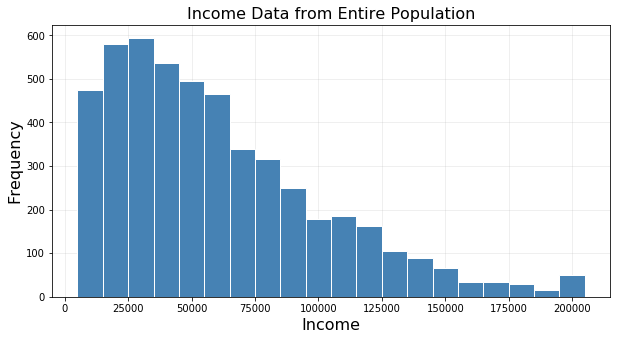

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
dfIncome.hist(column="Income", bins=20, color="steelblue", edgecolor="white", ax=ax)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_title("Income Data from Entire Population", fontsize=16)
ax.set_xlabel("Income", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16);

**Part B**: How would you characterize the distribution of Income in the population? 

possitive skew

**Part C**: Determine the mean-income for the entire population. 

In [9]:
dfIncome["Income"].mean()

60613.8492

**Part D**: In real life, we have populations much bigger than $5000$.  If we want to estimate the mean of the population we have to draw a sample from the population and compute the sample mean.  The important questions we have to ask are things like: 

- Is the sample mean a good approximation of the population mean? 
- How large does my sample need to be in order for the sample mean to well-approximate the population mean? 

Complete the following function to [sample](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html) $n$ rows from dfIncome and return the estimated mean. Start with a sample size of 10 and draw at least 5 estimated means from your function.  Are the estimated means good approximations to the population mean we computed above? What if you increase the sample size?  Discuss the results with your neighbors. 

In [7]:
def income_sample_mean(df, n):
    dfSample=df.sample(n) #gets n sample lines from the datafram df
    return dfSample["Income"].mean()


In [13]:
print(np.array([income_sample_mean(dfIncome,100) for ii in range(5)]))

[ <bound method Series.mean of 727     178562
2263    106619
1241     93350
3881     61143
1396     27949
4036     11559
4090     15197
2038     88002
346     193845
1334     19737
2805     54139
4580    117547
1302     22677
1543     67807
2453     43835
1763     35779
3760     58883
4557     17271
707      63203
460      52450
908      86561
2247     14386
340     148889
2224    105916
3001    140927
3004     13880
2160     14703
3186    134747
1590     55669
816     185514
         ...  
249      57613
3500    115765
3368     10066
1725     68279
2387    110286
3424     27330
3768     22827
4033     75125
3375     89152
2864    105253
539      33424
2271     60198
1413     77263
3294    119747
4970    203931
3649    116539
2570     40629
4292     47934
2660     17618
668      27789
1298     67004
4561     68335
3239    172537
3643     77993
656      31299
1940    108183
1860     73278
959      33592
842       6699
1636     99651
Name: Income, Length: 100, dtype: int64>
 <bound metho

**Part E**: Notice, that for a sample-size of $n$, our function is returning an estimator of the form 

$$
\bar{X} = \frac{1}{n}\sum_{k=1}^n X_k 
$$

If we think of each $X_k$ as being an independent and identically distributed (i.i.d.) random variable that follows the population distribution, what can you say about the estimated mean $\bar{X}$? 

**Part F**: If $\bar{X}$ is a random variable then it too must have a distribution. We call the distribution of $\bar{X}$ the **sample distribution**.  But what the heck does this distribution look like? 

Let's explore. 

One way that we could do this is to sample from the sample distribution by computing many **independent estimates** of the population mean and draw a histogram.  Complete the function income_sample_dist to draw at least 1000 estimates of the mean with a given sample size $n$ and then draw a histogram of the results. Start with a sample size of $n=5$ and then increase it to $n=50$, $n=500$, etc. Discuss your results with your neighbors. 

In [ ]:
def income_sample_dist(df, n=5, num_means=1000):
    means = # your code goes here! 
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    # and here!

### Exercise 2 - Estimating Means of the Binomial Distributions
*** 

The size of the sample that you have to draw before the estimator becomes approximately normally distributed depends on how non-normal the population distribution is.  In this exercise we'll look at the sample means of the Binomial distribution when $p=0.5$ (pretty normal) and $p=0.95$ (pretty non-normal). 

**Part A**: Draw at least $10000$ samples from the distribution $Bin(6,0.5)$ and $Bin(6,0.95)$ and make histograms with compatible axes-limits. 

**Part B**: We know from class that the expected value of $Bin(n,p)$ is $E[X] = np$.  Complete the function est_mean_bin below to draw estimates of the mean of $Bin(n,p)$ of a given sample size. Test your function by drawing several means with a sample size of your choice.  Do you get results that are fairly close to $E[X]$ for your given choice of parameter? 

In [ ]:
def est_mean_bin(n=6, p=0.5, sample_size=5):

    # your code goes here!
    

**Part C**: Complete the function sample_bin_dist that computes many independent estimates of the mean of $Bin(n,p)$ and plots their histogram.  Vary the size of the samples in each estimate.  How big does the sample size have to be for $Bin(6,0.5)$ before the sample distribution looks approximately normal? How big does the sample size have to be for $Bin(6,0.95)$ before the sample distribution looks approximately normal? 

In [ ]:
def sample_bin_dist(n=6, p=0.5, sample_size=5, num_means=int(5e4)):
    means = # your code goes here! 
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    # ... and here!

### Exercise 3 - The CLT and Monte Carlo Simulation 
*** 

In this exercise we'll see how we can use the CLT to estimate how good our approximation from a simulation actually is. 

**Part A**: Let $X$ be a random variable taking on the face values of a $d$-sided die after a single roll.  If the die is fair, then $X$ follows a discrete uniform distribution of the form $\textrm{unif}\{1,d\}$. Look up the mean and variance of $\textrm{unif}\{1,d\}$ on [wiki](https://en.wikipedia.org/wiki/Discrete_uniform_distribution) and figure out the specific values of the mean and variance when $d=6$.  


**Part B**: Write a function sim_die that takes as arguments integers $d$ representing the number of sides on the die and $n$ representing the number of iterations to run your simulation.  The function should return an estimate of the expected value of the die roll, as well as an array of the results of each of the $n$ rolls in the simulation. 

In [ ]:
def sim_die(d=6, n=int(1e3)):
    rolls = # your code goes here! 
    return np.mean(rolls), rolls

**Part C**: Write a function running_est that takes in your rolls history from **Part B** and computes the running estimate of the expected value after each new sample in the simulation.  That is, your function should return an array $r$ such that 

$$
r[i] = \frac{\textrm{Estimate after i samples}}{i} \quad \textrm{for }i=1,2,\ldots,n
$$

In [ ]:
def running_est(rolls):

    # your code goes here!
    

**Part D**: Let $\bar{X}_n$ the the random variable that estimates $E[X]$ using the first $n$ rolls of the simulation.  Based on the Central Limit Theorem, what distribution does the $\bar{X}_n$ follow when $d=6$. 


**Part E**: Give an upper and lower bound for a region that $\bar{X}_n$ will fall in with 95% probability when $d=6$ as a function of $n$. 

**Part F**: The following function takes the number of sides of the dice and your array of running estimates of the mean and plots the trajectory of the running estimate.  If you set the bounds flag to True it plots a shaded region enclosing the mean.  Currently the shaded region is a constant interval.  Your job in this part of the exercise is to modify the array err95 so that the shaded region depicts the 95% confidence interval around the mean of the estimator. 

**Note**: For bonus (non-existent) points, make your implementation general with respect to the number of sides on the dice.

In [ ]:
def running_plot(d, r, bounds=False):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
    ax.plot(range(1,len(r)+1),r, color="steelblue")
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_ylim([np.mean(range(1,d+1))-1.5, np.mean(range(1,d+1))+1.5])
    ax.set_xlim([1,len(r)])
    ax.set_xlabel("iteration", fontsize=16)
    ax.set_ylabel("estimate", fontsize=16)
    
    mu = 3.5
    var = np.nan
    sd = np.nan 
    
    if bounds: 
        err95 = np.ones(len(r))
        ax.fill_between(range(1,len(r)+1), mu+err95, mu-err95, color="steelblue", alpha=0.2)

In [ ]:
d=6
x, rolls = sim_die(d=d, n=int(1e3))    
r = running_est(rolls)
running_plot(d,r,bounds=True)

**Part G**: If you run your simulation enough times, you'll eventually get a case where the running estimate wanders outside of the shaded region.  How can you explain this? 

**Part F**: If you didn't make your bounds estimate general in **Part F**, go back and do so now.  Then run the experiment for dice with increasing number of sides.  What differences do you notice in the trajectory and confidence interval?  How can you explain the differences? 